In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate

https://stackoverflow.com/questions/73121255/is-there-a-method-in-python-to-numerically-integrate-data-within-curve-fit

In [2]:
X = np.array([[1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e-02],
[2.00000e+00, 9.91700e-01, 3.99900e+01, 2.40000e+00],
[3.00000e+00, 9.88400e-01, 5.24800e+01, 4.11000e+00],
[4.00000e+00, 9.86100e-01, 6.08100e+01, 3.08000e+00],
[5.00000e+00, 9.84300e-01, 6.76100e+01, 5.92000e+00],
[6.00000e+00, 9.84100e-01, 7.14500e+01, 3.95000e+00],
[7.00000e+00, 9.82200e-01, 8.79000e+01, 6.48000e+00],
[8.00000e+00, 9.80300e-01, 9.41900e+01, 4.77000e+00],
[9.00000e+00, 9.78400e-01, 1.07150e+02, 7.90000e+00],
[1.00000e+01, 9.76500e-01, 1.19670e+02, 9.93000e+00],
[1.10000e+01, 9.75800e-01, 1.09650e+02, 1.31600e+01],
[1.20000e+01, 9.74700e-01, 1.18580e+02, 1.25800e+01],
[1.30000e+01, 9.74400e-01, 1.41910e+02, 8.50000e+00],
[1.40000e+01, 9.72800e-01, 1.57040e+02, 1.44800e+01],
[1.50000e+01, 9.65900e-01, 1.78650e+02, 1.73000e+01],
[1.60000e+01, 9.65500e-01, 1.72980e+02, 1.67500e+01],
[1.70000e+01, 9.58700e-01, 1.78650e+02, 1.23500e+01],
[1.80000e+01, 9.56900e-01, 2.40990e+02, 1.88900e+01],
[1.90000e+01, 9.53400e-01, 2.34420e+02, 1.40400e+01],
[2.00000e+01, 9.52300e-01, 2.29090e+02, 1.79500e+01],
[2.10000e+01, 9.52100e-01, 2.02300e+02, 1.39900e+01],
[2.20000e+01, 9.51000e-01, 2.54680e+02, 1.40800e+01],
[2.30000e+01, 9.39800e-01, 3.32660e+02, 2.14600e+01],
[2.40000e+01, 9.30500e-01, 3.63080e+02, 2.84500e+01],
[2.50000e+01, 9.26100e-01, 3.38840e+02, 2.03000e+01],
[2.60000e+01, 9.19700e-01, 4.38530e+02, 3.84200e+01],
[2.70000e+01, 9.08300e-01, 4.80840e+02, 3.32400e+01],
[2.80000e+01, 8.89300e-01, 6.33870e+02, 3.79700e+01],
[2.90000e+01, 7.69200e-01, 1.88799e+03, 2.09090e+02],
[3.00000e+01, 7.24600e-01, 2.11836e+03, 1.95380e+02],
[3.10000e+01, 6.99300e-01, 2.22844e+03, 2.88140e+02],
[3.20000e+01, 6.99300e-01, 3.23594e+03, 3.73370e+02],
[3.30000e+01, 6.94400e-01, 2.45471e+03, 1.92370e+02],
[3.40000e+01, 6.75700e-01, 3.09030e+03, 2.42180e+02],
[3.50000e+01, 6.66700e-01, 3.01995e+03, 2.36670e+02],
[3.60000e+01, 6.36900e-01, 3.56451e+03, 3.12290e+02],
[3.70000e+01, 6.17300e-01, 3.94457e+03, 3.09130e+02],
[3.80000e+01, 5.07600e-01, 7.55092e+03, 1.04652e+03]])

In [23]:
x = X[:,1]
y = X[:,2]/8000
s = X[:,3]

In [24]:
def integral(x, x0, k):
    def integrand(x, x0):
        return 1. / (x * np.sqrt((x0 / x) + (1 - x0)))
    return integrate.quad(integrand, 0.5076, 1., args=(k,))[0]

In [25]:
def submodel(x, x0, k):
    return integral(x, x0, k) * np.sqrt(np.abs(1. - x0)) 

In [26]:
def model(x, x0, k, c):
    return (c / (x * k * np.sqrt(np.abs(1. - x0)))) * np.sqrt(np.abs(1. - x0)) * np.sinh(submodel(x, x0, k))

In [34]:
popt, pcov = optimize.curve_fit(model, x, y, sigma=s, p0=[65, 0.01, 20000], bounds=([50, 0.001, 0],[80, 1.0, 1e6]), absolute_sigma=True)
popt, pcov

(array([5.00000000e+01, 1.00000000e+00, 3.19485602e-07]),
 array([[ 4.95540209e+16, -2.97442141e+18, -1.44851892e+12],
        [-2.97442141e+18,  1.78536122e+20,  8.69456326e+13],
        [-1.44851892e+12,  8.69456326e+13,  4.23418127e+07]]))

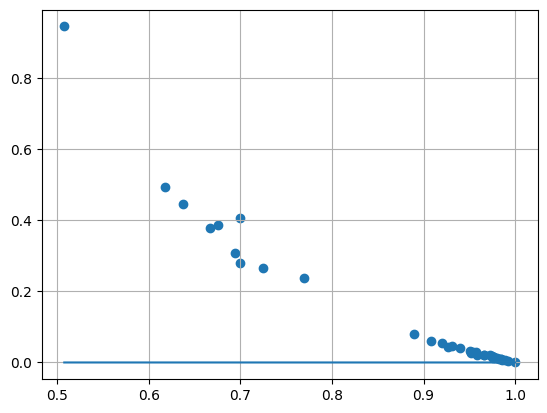

In [35]:
fig, axe = plt.subplots()
#axe.errorbar(x, y, yerr=s, linestyle="none", marker=".")
axe.scatter(x, y)
axe.plot(x, model(x, *popt))
axe.grid()